In [10]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)
# read_rmsp()

0:00:00.001 ₀╷₀₀╷₀₀.₀₀₁ init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__
1,_log,_o,adds,datetime,df_info,dfr,disp,display,glob,gmtime
2,grpp,ii,init,isfile,join,l,listdir,math,merge_OKVED,np
3,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start,strftime,time
4,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-,-,-


,name,rows,cols,memory,keys


In [11]:
import sys
sys.path.append('settings/')
import ftps

ftps = reload(ftps)
ftps
ftps.reg
locals().update(ftps.reg)
server

'31.31.196.98'

In [54]:
df[:3]

,obs_time,temp,feels_like,icon,condition,wind_speed,wind_dir,pressure_mm,pressure_pa,humidity,daytime,polar,season,wind_gust,pressure_pa_avg,humidity_avg
0,1640782800,-12,-17,skc_n,clear,2.0,ne,752,1002,78,n,False,winter,6.8,NaN,NaN
1,1640937600,-5,-10,bkn_d,cloudy,2.9,s,741,987,88,d,False,winter,7.2,NaN,NaN
2,1640941200,-5,-10,bkn_d,cloudy,2.9,s,741,987,88,d,False,winter,7.9,NaN,NaN


In [285]:
yandex_weather_cols = {
    "now": 1641137402,
    "now_dt": "2022-01-02T15:30:02.853873Z",
    "info": {"url": "https://yandex.ru/pogoda/213?lat=55.692\u0026lon=37.347", "lat": 55.692, "lon": 37.347},
    "fact": {
        "obs_time": 1641135600,
        "temp": -8,
        "feels_like": -12,
        "icon": "ovc",
        "condition": "overcast",
        "wind_speed": 1,
        "wind_dir": "w",
        "pressure_mm": 742,
        "pressure_pa": 989,
        "humidity": 83,
        "daytime": "n",
        "polar": False,
        "season": "winter",
        "wind_gust": 6.6
    },
    "forecast": {
        "date": "2022-01-03",
        "date_ts": 1641157200,
        "week": 1,
        "sunrise": "08:59",
        "sunset": "16:10",
        "moon_code": 8,
        "moon_text": "moon-code-8",
        "parts": [{
            "part_name": "night",
            "temp_min": -12,
            "temp_avg": -12,
            "temp_max": -10,
            "wind_speed": 1.9,
            "wind_gust": 3.6,
            "wind_dir": "sw",
            "pressure_mm": 741,
            "pressure_pa": 987,
            "humidity": 86,
            "prec_mm": 0,
            "prec_prob": 0,
            "prec_period": 360,
            "icon": "bkn_n",
            "condition": "cloudy",
            "feels_like": -17,
            "daytime": "n",
            "polar": False
        }, {
            "part_name": "morning",
            "temp_min": -11,
            "temp_avg": -10,
            "temp_max": -9,
            "wind_speed": 2.3,
            "wind_gust": 4.8,
            "wind_dir": "s",
            "pressure_mm": 738,
            "pressure_pa": 983,
            "humidity": 87,
            "prec_mm": 0.3,
            "prec_prob": 30,
            "prec_period": 360,
            "icon": "ovc_-sn",
            "condition": "light-snow",
            "feels_like": -15,
            "daytime": "d",
            "polar": False
        }]
    }
}

print (yandex_weather_cols['forecast']['parts'][0].keys())

dict_keys(['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar'])


In [15]:
level_1 = ['now', 'now_dt', 'info', 'fact', 'forecast']
fact_cols = ['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
        'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
        'humidity', 'daytime', 'polar', 'season', 'wind_gust']

forecast = ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info =  ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info_parts = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 
                  'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 
                  'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

predict = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity',
            'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

In [16]:
from ftplib import FTP
import json

import pandas as pd
import sys
sys.path.append('settings/')
import ftps
ftps = reload(ftps)
global buff 

locals().update(ftps.reg)


def read_weather_from ():
    filename = r"www/gpxlab.ru/api/cache_clock/json_yandex_weather_history.json"
    # Just one of the files;

    ftp = FTP(server)
    
    ftp.login(user = username, passwd = password)
    ftp.cwd("/www/gpxlab.ru/api/cache_clock/")

    filename = r"json_yandex_weather_history_tmp.json"

    with open(filename, "wb") as file:
        ftp.retrbinary('RETR json_yandex_weather_history.json', file.write)

    file = open(filename, "r")
    buff = file.read()
    

    file.close()
    ftp.quit()
    
    weather_JSON = json.loads("{"+buff[:-2]+"}")
    
    weather_fact=[]
    weather_predict = []

    for l in list(weather_JSON.items()): #[:100]:
        t,ob = l
        
        weather_fact.append(ob['fact'])
        
        jsonString_merged  = {**{'obs_time': ob['fact']['obs_time'] + 12*60*60 },**ob['forecast'], **ob['forecast']['parts'][1]}
        del jsonString_merged['parts']
        
        weather_predict.append(jsonString_merged)

    # df = pd.json_normalize(weather_JSON['now'])
    
    dfr['fact'] = pd.DataFrame(weather_fact, columns=fact_cols)   
    dfr['fact'].drop_duplicates(subset=['obs_time'],inplace=True)
    
    dfr['predict'] = pd.DataFrame(weather_predict)
    dfr['predict'].drop_duplicates(subset=['obs_time'],inplace=True)    
    
    dfr['predict'].columns =  dfr['predict'].columns.values + '_predict'
    
    
    df = pd.merge(dfr['fact'], dfr['predict'], left_on = 'obs_time', right_on = 'obs_time_predict', how='outer' )

#     df = pd.concat([dfr['fact'], dfr['predict']] )
    
    
    df['obs_time'].fillna(df['obs_time_predict'], inplace=True)
    
    df = df.sort_values(['obs_time'], ascending=True)    

    
    print(df.shape)

    print(df.shape)  
    return df
  
df = read_weather_from ()
# df['t'] = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in df['obs_time']]
# df
# Do some other logic not relevant to the question
tm('>>>>')

# disp(df[:10].T)
# print (df.count())
# print (dfr['predict'].count())

(101, 40)
(101, 40)
0:01:49.761 ₀╷₀₁╷₄₉.₇₆₃ >>>>


In [8]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

def draw_l (**kwargs):
    print (kwargs.items())
    s = Struct(**kwargs)
    d = {}
    
    for key, value in kwargs.items():
        print("{} = {}".format(key, value))

        # print("{} = {}".format(key, value))
    print (s.color)    

*** Start at: 02:20:52 ₂₀₂₂₋₀₁₋₀₄  ************************************************************
(101, 40)
(101, 40)


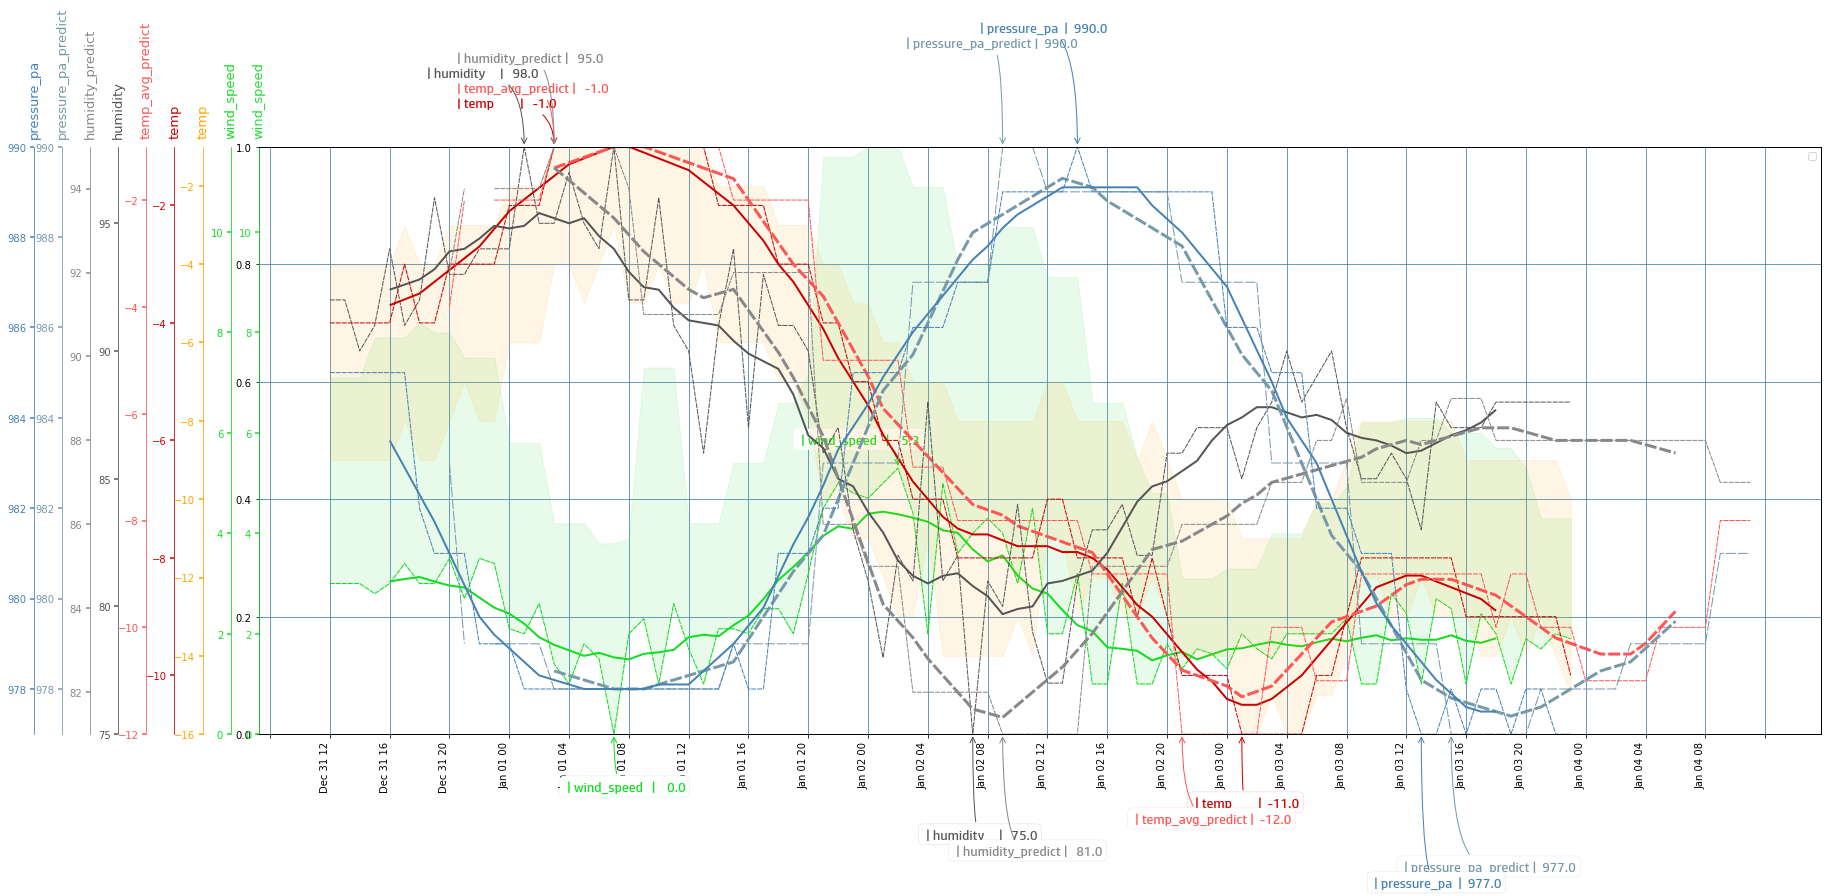

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates

tm()

cols =['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
        'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
        'humidity', 'daytime', 'polar', 'season', 'wind_gust']

global ax, ax_shift,annotation_shift,annotations,legend
annotations = []
ax = {}
legend = {}

ax_shift = 0 
annotation_shift = 0


df = read_weather_from()[5:]

x = [datetime.utcfromtimestamp(ts).strftime('%b %d %H') for ts in df['obs_time']]

fig,ax1  = plt.subplots()

plt.rcParams["figure.figsize"] = (28,12)

loc = plticker.MultipleLocator(base=4.0)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%Y %H:%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()


ax1.tick_params(axis='x', rotation=90)
ax1.grid(color='steelblue')



def draw_line (**kwargs):
    
    global ax_shift,annotation_shift,annotations, ax, legend
    
    p= Struct(**kwargs)
    k = p.data_key
    
    ax[k] = ax1.twinx()
    ax[k].xaxis.set_major_locator(loc)
    
    y_max = p.max_y if hasattr(p, 'max_y') else df[k].max()
    y_min = p.min_y if hasattr(p, 'min_y') else df[k].min()
    
    ax[k].set_ylim([y_min, y_max])
  
    ax[k].spines['left'].set_position(("axes",ax_shift))
    ax[k].spines['left'].set_color(p.color)    
    ax[k].yaxis.set_label_coords(ax_shift,1.02)
    ax[k].set_ylabel('Example', fontsize=13, horizontalalignment='left', position=(ax_shift-0.004,1.015))
    
    ax[k].yaxis.set_ticks_position('left')
    ax_shift -= .018
    

    ax[k].yaxis.label.set_color(p.color)
    ax[k].set_ylabel(k)

    tkw = dict(size=4, width=1.5)
    ax[k].tick_params(axis='y', colors=p.color, **tkw)
        
    if p.plot_type == 'fill' :
#         ax[k].fill_between(x, df[k], where=(df[k] > -30), color=p.color, alpha=p.alfa)
        ax[k].fill_between(x, df[k], df[p.fill_k] , color=p.color, alpha=p.alfa)
        
#         legend[k] = k
    else:
        legend[k] = k
        ax[k].plot(x,df[k], color=p.color, linewidth=p.linewidth, linestyle=p.linestyle, 
                   dashes= p.dashes if hasattr(p, 'dashes') else (5,1), 
                   marker=p.marker)
        annotations.append( (x,df[k],k,p.color,ax[k] ))

    if hasattr(p, 'rolling_avg') :
        df[k+'_avg'] = df[k].rolling(window=10).mean().shift(-5)

        y_max = p.max_y if hasattr(p, 'max_y') else df[[k+'_avg',k]].max().max()
        y_min = p.min_y if hasattr(p, 'min_y') else df[[k+'_avg',k]].min().min()
        
        
        [lw,ls,dash] = [3,':',(4, 1)] if 'pred' in k else [2,'-',(1, 0)]
        
        ax[k].plot(x,df[k+'_avg'], color=p.color, linewidth=lw, linestyle=ls, dashes=dash, marker=p.marker)
        ax[k].set_ylim([y_min, y_max])
    


wind_min = df[['wind_gust','wind_speed']].min().min()
wind_max = df[['wind_gust','wind_speed']].max().max()

# draw_line(data_key = 'wind_gust',       plot_type='fill', color="orange",  linewidth=0.6, alfa=.3, linestyle='-', marker='',
#           max_y=wind_max, min_y=wind_min  )        
draw_line(data_key = 'wind_speed',      plot_type='fill', color="#22dd33",  linewidth=1, alfa=.1, linestyle='--', marker='', 
          max_y=wind_max, min_y=wind_min,  fill_k = 'wind_gust')  

draw_line(data_key = 'wind_speed',      plot_type='line', color="#11dd22",  
          linewidth=1, alfa=.3, linestyle='--', marker='',
          max_y=wind_max, min_y=wind_min,  
          rolling_avg = True
         ) 



temp_max = df[['feels_like','temp']].max().max()
temp_min = df[['feels_like','temp']].min().min()

draw_line(data_key = 'temp',            plot_type='fill', color="orange",  linewidth=2, alfa=.1, linestyle='-', marker='', 
         max_y=temp_max, min_y=temp_min, fill_k = 'feels_like')


draw_line(data_key = 'temp', plot_type='line', 
          color="#c00",  linewidth=1, alfa=.3, linestyle=':', marker='', rolling_avg = True)

draw_line(data_key = 'temp_avg_predict', plot_type='line', 
          color="#f55", linewidth=1, alfa=.3, linestyle='-', marker='',  rolling_avg = True)


draw_line(data_key = 'humidity',     plot_type='line', 
          color="#555", linewidth=1, alfa=.3, linestyle=':',   marker='',  rolling_avg = True )

draw_line(data_key = 'humidity_predict',     plot_type='line', 
          color="#888", linewidth=1, alfa=.3, linestyle='-',  marker='',   rolling_avg = True )


draw_line(data_key = 'pressure_pa_predict',  plot_type='line', color="#7799aa", linewidth=1, alfa=.3, linestyle='--', marker='', dashes=(10,2),
          rolling_avg = True)

draw_line(data_key = 'pressure_pa',     plot_type='line', color="steelblue", linewidth=1, alfa=.3, linestyle='-', marker='',
          rolling_avg = True)


ax1.legend([l for l in legend])


[annot_max(a) for a in annotations]


plt.show()

plt_text = "yandex_weather_forecast"

text_time = strftime("%Y-%m-%d %H-%M-%S", gmtime())

fig.savefig('plt/'+plt_text.replace('/','_') +'('+text_time+').png', bbox_inches='tight')  

# data = pd.DataFrame(dict(
#     s1=[v for v in df['diff']],
#     s2=[v for v in df['speed']]
# ))
# plot_multi(data.cumsum(), figsize=(10, 5))

In [25]:
def annot_max(param):
    
    global  annotation_shift
    
    annotation_shift += 1
    
    (x,y,k,color,ax) = param
    
    xmax = x[np.argmax(y)]
    ymax = y.max()
    

  
    text= "x={:.3s}, y={:.3f}".format(xmax, float(ymax))
    text= "%s | %s | %s"%(xmax[8:-6], k.ljust(12),   str(ymax).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=1, pad=0.3", fc="w", ec=color, lw=0, color=color)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=90", color=color, lw=1)
    kw = dict(xycoords='data',textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top", color=color)
    
#     ax.annotate(text, xy=(xmax, ymax), xytext=(0.5, 1.0 - annotation_shift), **kw, family='HP Simplified', fontsize=14)

    ax.annotate(text, xy=(xmax, ymax),  xytext=(-100, 20 + annotation_shift*15 ), **kw, family='HP Simplified', fontsize=14)
    
   
    
#     ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
    
    xmax = x[np.argmin(y)]
    ymax = y.min()
    
  
    text= "x={:.3s}, y={:.3f}".format(xmax, float(ymax))
    text= "%s | %s | %s"%(xmax[8:-6], k.ljust(12),   str(ymax).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=1, pad=0.3", fc="w", ec=color, lw=0.1, color=color)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=90", color=color, lw=1)
    kw = dict(xycoords='data',textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top", color=color)
    ax.annotate(text, xy=(xmax, ymax), xytext=(-50, -30 - annotation_shift*16), **kw, family='HP Simplified', fontsize=14)
    
    
    
#     https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

In [402]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))